<a href="https://colab.research.google.com/github/AkkiNikumbh/ML-EXPERIMENTS/blob/main/AkashSingh_Experiment10_MDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Task 1: DEFINE THE GRIDWORLD (3x4)
rows, cols = 3, 4

# Valid states except the wall at (1,1)
states = [(r, c) for r in range(rows) for c in range(cols) if not (r == 1 and c == 1)]

# Terminal states
terminal_states = [(0,3), (1,3)]   # goal, pit

# Actions
ACTIONS = ["up", "down", "left", "right"]

# Reward function
def get_reward(state, living_penalty=-0.04):
    if state == (0,3):   # Goal
        return 1.0
    if state == (1,3):   # Pit
        return -1.0
    return living_penalty

# Discount factor
gamma = 0.99

# Task 1: TRANSITION MODEL (GET NEXT STATES)
def move(state, action):
    r, c = state
    if action == "up": r -= 1
    elif action == "down": r += 1
    elif action == "left": c -= 1
    elif action == "right": c += 1

    # Check boundaries and wall
    if (0 <= r < rows) and (0 <= c < cols) and not (r == 1 and c == 1):
        return (r, c)
    return state  # invalid move → stay in same state

def get_next_states(state, action):
    if state in terminal_states:
        return [(1.0, state)]  # terminal → stays forever

    # Main movement slip model
    direction_map = {
        "up": ("up", "left", "right"),
        "down": ("down", "right", "left"),
        "left": ("left", "down", "up"),
        "right": ("right", "up", "down")
    }

    intended, slip1, slip2 = direction_map[action]

    return [
        (0.8, move(state, intended)),
        (0.1, move(state, slip1)),
        (0.1, move(state, slip2))
    ]

In [3]:
# Task 2: VALUE ITERATION

def value_iteration(theta=0.0001, living_penalty=-0.04):
    V = {s: 0.0 for s in states}

    while True:
        delta = 0
        new_V = V.copy()

        for s in states:
            if s in terminal_states:
                continue

            # Compute Q(s,a)
            q_values = []
            for a in ACTIONS:
                q = 0
                for prob, next_s in get_next_states(s, a):
                    r = get_reward(next_s, living_penalty)
                    q += prob * (r + gamma * V[next_s])
                q_values.append(q)

            new_V[s] = max(q_values)
            delta = max(delta, abs(new_V[s] - V[s]))

        V = new_V
        if delta < theta:
            break

    return V

In [4]:
# Task 3: POLICY EXTRACTION

def extract_policy(V, living_penalty=-0.04):
    policy = {}

    for s in states:
        if s in terminal_states:
            policy[s] = "TERMINAL"
            continue

        best_a = None
        best_q = -1e9

        for a in ACTIONS:
            q = 0
            for prob, next_s in get_next_states(s, a):
                r = get_reward(next_s, living_penalty)
                q += prob * (r + gamma * V[next_s])
            if q > best_q:
                best_q = q
                best_a = a

        policy[s] = best_a
    return policy

Final Value Function:


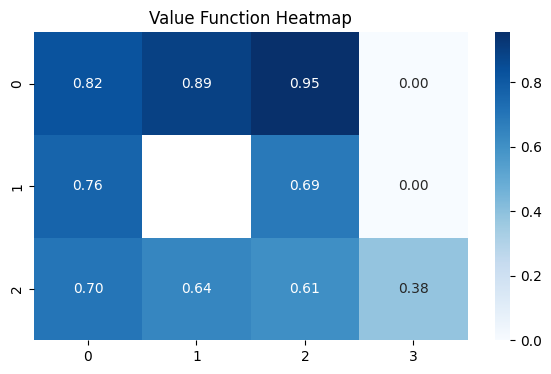


Optimal Policy:
['→' '→' '→' '■']
['↑' 'X' '↑' '■']
['↑' '←' '↑' '←']


In [5]:
# Task 4: VISUALIZATION FUNCTIONS

def show_value_function(V):
    grid = np.zeros((rows, cols))
    for r in range(rows):
        for c in range(cols):
            if (r,c) == (1,1):
                grid[r,c] = np.nan
            else:
                grid[r,c] = V[(r,c)]

    plt.figure(figsize=(7,4))
    sns.heatmap(grid, annot=True, cmap="Blues", fmt=".2f")
    plt.title("Value Function Heatmap")
    plt.show()

def show_policy(policy):
    arrow = {
        "up": "↑",
        "down": "↓",
        "left": "←",
        "right": "→",
        "TERMINAL": "■"
    }

    grid = np.empty((rows, cols), dtype=object)
    for r in range(rows):
        for c in range(cols):
            if (r,c) == (1,1):
                grid[r,c] = "X"
            else:
                grid[r,c] = arrow[policy[(r,c)]]

    print("\nOptimal Policy:")
    for r in range(rows):
        print(grid[r])

# RUN COMPLETE PIPELINE (DEFAULT living_penalty = -0.04)

V = value_iteration()
policy = extract_policy(V)

print("Final Value Function:")
show_value_function(V)

show_policy(policy)